In [1]:
## import modules
import numpy as np 
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
from keras.callbacks import Callback

from keras.datasets import mnist

SEED = 2017

Using TensorFlow backend.


In [2]:
## import MNIST data
#(X_train, y_train), (X_val, y_val) = mnist.load_data()

b = np.load('./data/mnist.npz')
## train and test data
X_train, y_train, X_val, y_val = b['x_train'], b['y_train'], b['x_test'], b['y_test']

Sahpe of training data :  (60000, 28, 28)
label ;  3


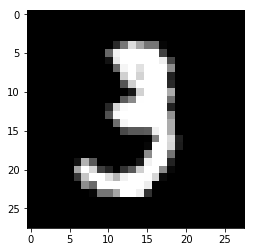

In [3]:
## data review
print("Sahpe of training data : ", X_train.shape)
i = 10
print("label ; ", y_train[i])
plt.imshow(X_train[i], cmap='gray')
plt.show()

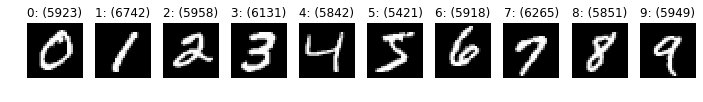

In [4]:
## Data Visualization
# Plot first image of each label
unique_labels = set(y_train)
plt.figure(figsize=(12, 12))

i = 1
for label in unique_labels:
    image = X_train[y_train.tolist().index(label)]
    plt.subplot(10, 10, i)
    plt.axis('off')
    plt.title("{0}: ({1})".format(label, y_train.tolist().count(label)))
    i += 1
    _ = plt.imshow(image, cmap='gray')
plt.show()

In [5]:
## Feature Engineering
## Normalize data
X_train2 = X_train.astype('float32')/255.
X_val2 = X_val.astype('float32')/255.

## One-Hot-Encode labels
n_classes = 10
y_train2 = to_categorical(y_train, n_classes)
y_val2 = to_categorical(y_val, n_classes)

## Flatten data - we threat the image as a sequential array of values
X_train3 = np.reshape(X_train2, (60000, 784))
X_val3 = np.reshape(X_val2, (10000, 784))

In [6]:
## Final Data shape
print(X_train.shape, X_val.shape)
print(X_train2.shape, X_val2.shape)
print(X_train3.shape, X_val3.shape)
print()
print(y_train.shape, y_val.shape)
print(y_train2.shape, y_val2.shape)

(60000, 28, 28) (10000, 28, 28)
(60000, 28, 28) (10000, 28, 28)
(60000, 784) (10000, 784)

(60000,) (10000,)
(60000, 10) (10000, 10)


In [7]:
## Build DNN model with Sigmoid Activation Function
model = Sequential()
model.add(Dense(700, input_dim=784, activation='relu'))
model.add(Dense(700, activation='relu'))
model.add(Dense(700, activation='relu')) 
model.add(Dense(350, activation='relu')) 
model.add(Dense(100, activation='relu')) 
model.add(Dense(10, activation='softmax'))

# Compile model with SGD
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [8]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 700)               549500    
_________________________________________________________________
dense_2 (Dense)              (None, 700)               490700    
_________________________________________________________________
dense_3 (Dense)              (None, 700)               490700    
_________________________________________________________________
dense_4 (Dense)              (None, 350)               245350    
_________________________________________________________________
dense_5 (Dense)              (None, 100)               35100     
_________________________________________________________________
dense_6 (Dense)              (None, 10)                1010      
Total params: 1,812,360
Trainable params: 1,812,360
Non-trainable params: 0
_________________________________________________________________


In [18]:
## Train the model with training data. 
model.fit(X_train3, y_train2, epochs=10, batch_size=256, validation_data=(X_val3,y_val2), verbose=1)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 10s 167us/step - loss: 0.1908 - acc: 0.9455 - val_loss: 0.1922 - val_acc: 0.9447
Epoch 2/10
60000/60000 [==============================] - 10s 167us/step - loss: 0.1806 - acc: 0.9479 - val_loss: 0.1770 - val_acc: 0.9467
Epoch 3/10
60000/60000 [==============================] - 10s 167us/step - loss: 0.1715 - acc: 0.9512 - val_loss: 0.1739 - val_acc: 0.9483
Epoch 4/10
60000/60000 [==============================] - 10s 167us/step - loss: 0.1628 - acc: 0.9532 - val_loss: 0.1637 - val_acc: 0.9518
Epoch 5/10
60000/60000 [==============================] - 10s 164us/step - loss: 0.1546 - acc: 0.9555 - val_loss: 0.1546 - val_acc: 0.9542
Epoch 6/10
60000/60000 [==============================] - 10s 167us/step - loss: 0.1480 - acc: 0.9579 - val_loss: 0.1519 - val_acc: 0.9556
Epoch 7/10
60000/60000 [==============================] - 10s 165us/step - loss: 0.1421 - acc: 0.9593 - val_loss: 0.

In [10]:
## Predict with the trained model
pred = model.predict(X_val3)

In [11]:
i = 90
print("Actual data : ", y_val[i])
print("Predicted: ", pred[i])
print("Predicted value: ", np.argmax(pred[i]))

Actual data :  3
Predicted:  [2.8714942e-04 8.7358996e-05 7.3439372e-04 9.5785195e-01 3.5329986e-06
 3.3736490e-02 1.1627815e-06 5.7233626e-04 4.3212445e-03 2.4044844e-03]
Predicted value:  3


In [13]:
### Model Parameters Extraction
## Extract parametes from the trained model
weights2=[]

print(model.layers)

for layer in model.layers:
    weight=layer.get_weights()
    weights2.append(weight)

[<keras.layers.core.Dense object at 0x000001BDD7B1B9B0>, <keras.layers.core.Dense object at 0x000001BDD7E30E48>, <keras.layers.core.Dense object at 0x000001BDD7E30550>, <keras.layers.core.Dense object at 0x000001BDD7B27C50>, <keras.layers.core.Dense object at 0x000001BDD7E26EF0>, <keras.layers.core.Dense object at 0x000001BDD80F69B0>]


In [16]:
print("Number of layers: ", len(weights2))

print("1st layer in model :", len(weights2[0]))
print("      weights: ", weights2[0][0].shape)
print("      bias : ", weights2[0][1].shape)

print("2nd layer in model :", len(weights2[1]))
print("      weights: ", weights2[1][0].shape)
print("      bias : ", weights2[1][1].shape)

print("3rd layer in model :", len(weights2[2]))
print("      weights: ", weights2[2][0].shape)
print("      bias : ", weights2[2][1].shape)

print("4th layer in model :", len(weights2[3]))
print("      weights: ", weights2[3][0].shape)
print("      bias : ", weights2[3][1].shape)

print("5th layer in model :", len(weights2[4]))
print("      weights: ", weights2[4][0].shape)
print("      bias : ", weights2[4][1].shape)

print("6th layer in model :", len(weights2[5]))
print("      weights: ", weights2[5][0].shape)
print("      bias : ", weights2[5][1].shape)

Number of layers:  6
1st layer in model : 2
      weights:  (784, 700)
      bias :  (700,)
2nd layer in model : 2
      weights:  (700, 700)
      bias :  (700,)
3rd layer in model : 2
      weights:  (700, 700)
      bias :  (700,)
4th layer in model : 2
      weights:  (700, 350)
      bias :  (350,)
5th layer in model : 2
      weights:  (350, 100)
      bias :  (100,)
6th layer in model : 2
      weights:  (100, 10)
      bias :  (10,)


In [19]:
print(weights2[0][0])

[[-0.00444709 -0.04365118 -0.02491393 ... -0.03783811 -0.03619938
  -0.02900833]
 [-0.04694156 -0.05927375 -0.05468663 ... -0.0419594  -0.01280696
  -0.03004756]
 [ 0.05923524 -0.00077683 -0.06150835 ...  0.04015543  0.05375114
   0.0315309 ]
 ...
 [ 0.05169898  0.06244323 -0.02433132 ... -0.02900487 -0.01455933
  -0.05388777]
 [ 0.00845893 -0.02073254  0.03386652 ...  0.0537618  -0.01335836
   0.01430424]
 [ 0.03848212 -0.04333223 -0.03767564 ... -0.03654511 -0.06195962
   0.04780655]]
